In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geneticalgo as ga
import ta

C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


The number of indicators in the genome is 22


In [2]:
# read the sp500 data
df_sp=pd.read_csv("../data/2021-12-06_Top25 SP500 daily.csv")
df_sp["datadate"] = pd.to_datetime(df_sp["datadate"].astype(str), format='%Y%m%d')
df_sp = df_sp[["datadate", "conm", "tic", "prcod", "prccd", "prchd", "prcld", "cshtrd"]].rename(columns={"prcod": "Open", "prccd": "Close", "prchd": "High", "prcld": "Low", "cshtrd": "Volume"})

In [3]:
df_stock = df_sp[df_sp["tic"]=="AAL"]
df_stock = df_stock.drop(columns=["conm", "tic"])
df_stock = df_stock.sort_values(by="datadate")
df_stock.reset_index(inplace=True, drop=True)
df_stock.head()

,datadate,Open,Close,High,Low,Volume
0,2013-12-09,23.95,24.60,25.44,23.4501,43167060.0
1,2013-12-10,24.54,24.88,25.17,24.4100,18648140.0
2,2013-12-11,25.44,25.99,27.20,25.3700,38584270.0
3,2013-12-12,26.20,25.45,26.71,25.4500,19977100.0
4,2013-12-13,25.61,26.23,26.30,25.5201,12189890.0


In [4]:
def plot_signal(df_stock, buy_signal, indicator1=None, indicator2=None):
    plt.plot(df_stock["datadate"], df_stock["Close"])
    plt.scatter(df_stock["datadate"], df_stock[buy_signal], color="green", marker="x")
    if indicator1 != None:
        plt.plot(df_stock["datadate"], df_stock[indicator1], color="orange")
    if indicator2 != None:
        plt.plot(df_stock["datadate"], df_stock[indicator2], color="red")
    plt.show()
    
# TODO show only a smaller timeframe
# df_stock = df_stock.iloc[100:300] or use function from pyplot

In [5]:
def replace_null(x):
    if x == 0:
        return None
    else:
        return x

## Crossing of two Simple Moving Average

In [6]:
sma1=50
sma2=200
sma_cross = ga.trading.sma_cross(df_stock, sma1, sma2)
df_stock["sma_cross"] = sma_cross
df_stock["sma_cross_signal"] = (df_stock["sma_cross"] * df_stock["Close"]).apply(replace_null)
print(f"Number of buy-signal is {sma_cross.count(1.0)}")
df_stock[f"sma_{sma1}"]= ta.trend.SMAIndicator(df_stock["Close"], window=sma1, fillna=True).sma_indicator()
df_stock[f"sma_{sma2}"] = ta.trend.SMAIndicator(df_stock["Close"], window=sma2, fillna=True).sma_indicator()   

Number of buy-signal is 3


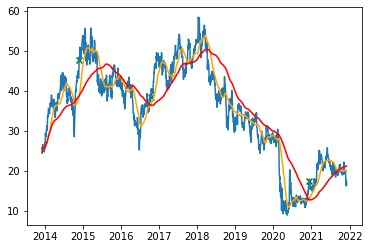

In [7]:
plot_signal(df_stock, "sma_cross_signal", f"sma_{sma1}", f"sma_{sma2}")

## Price crosses Simple Moving Average from below

In [8]:
sma1=20
price_sma_cross = ga.trading.price_sma_cross(df_stock, sma1)
df_stock["price_sma_cross"] = price_sma_cross
df_stock["price_sma_cross_signal"] = (df_stock["price_sma_cross"] * df_stock["Close"]).apply(replace_null)
print(f"Number of buy-signal is {price_sma_cross.count(1.0)}")
df_stock[f"sma_{sma1}"]= ta.trend.SMAIndicator(df_stock["Close"], window=sma1, fillna=True).sma_indicator()

Number of buy-signal is 44


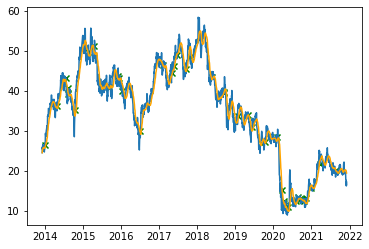

In [9]:
plot_signal(df_stock, "price_sma_cross_signal", f"sma_{sma1}")

## Average Directional Index (ADX)

In [10]:
adx_limit = 25
window = 14
adx = ga.trading.adx(df_stock, adx_limit, window)
df_stock["adx"] = adx
df_stock["adx_signal"] = (df_stock["adx"] * df_stock["Close"]).apply(replace_null)
print(f"Number of buy-signal is {adx.count(1.0)}")

C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Steffen\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


Number of buy-signal is 778


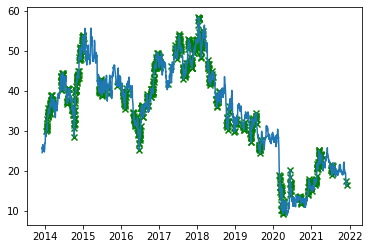

In [11]:
plot_signal(df_stock, "adx_signal")

## Moving Average Convergence Divergence (MACD)

In [12]:
slow = 26
fast = 12
signal = 9
macd = ga.trading.macd(df_stock, slow, fast, signal)
df_stock["macd"] = macd
df_stock["macd_signal"] = (df_stock["macd"] * df_stock["Close"]).apply(replace_null)
print(f"Number of buy-signal is {macd.count(1.0)}")

Number of buy-signal is 33


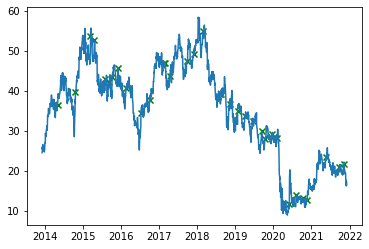

In [13]:
plot_signal(df_stock, "macd_signal")

In [14]:
list1=price_bb_cross(df_aag,20,2)
list4=price_ema_cross(df_aag,20, 50)
list5=macd(df_aag,26,12,9)

NameError: name 'price_bb_cross' is not defined